<a href="https://novoic.com"><img src="https://novoic.com/wp-content/uploads/2019/10/logo_320px.png" alt="Novoic logo" width="160"/></a>

# Novoic ML challenge – text data - Dr Gizem Buldum

## Introduction
Welcome to the Novoic ML challenge!

In this notebook I will analyse categorised SMS data.

## Download the data
Copy the dataset to a local directory – this should take a few seconds.

In [76]:
!mkdir -p data
!gsutil -m cp -r gs://novoic-ml-challenge-text-data/* ./data

Copying gs://novoic-ml-challenge-text-data/LICENSE...
Copying gs://novoic-ml-challenge-text-data/README.md...
Copying gs://novoic-ml-challenge-text-data/data.txt...
/ [3/3 files][468.7 KiB/468.7 KiB] 100% Done                                    
Operation completed over 3 objects/468.7 KiB.                                    


## Inspecting the data

Let's have a quick look at what the data looks like by printing a few lines from data.txt

In [77]:
with open('data/data.txt', 'r') as f:
    msgs = f.read().splitlines()
print(msgs[10])
print(msgs[11])
print(len(msgs))

ham	I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.
spam	SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info
5574


### Data format

The data comprises 5,574 SMS messages. Each message is labelled as either 'ham' (legitimate) or spam.

Each line in `data.txt` corresponds to one message. The first word is the data label (either `ham` or `spam`), followed by a tab (`\t`) character and then the message.

We can see that `data.txt` is in CSV format so from now I'm going to use the `pandas` library to create a data frame and then do some exploratory analysis.

Let's print the first 10 lines of the file.

In [78]:
import pandas as pd
msgs = pd.read_csv('data/data.txt', sep='\t', names=["label", "message"])
msgs.head(10)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


### Basic Data Visualisation and Analysis
Let's find out what is the number of words and length stats of the messages. Let's also do some word cloud plots.

#### Word Cloud Visualisation
Two categories can be differentiated from each word cloud diagram. 
- spam: free, win, mobile, entry, winner, etc.
- ham: say, name, available, go, point, etc

In [0]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def wordcloud(category):
  text = msgs[msgs.label == category]['message']
  wordcloud = WordCloud(
      width = 750,
      height = 500,
      background_color = 'black',
      stopwords = STOPWORDS).generate(str(text))
  fig = plt.figure(
      figsize = (10, 8),
      facecolor = 'k',
      edgecolor = 'k')
  plt.imshow(wordcloud, interpolation = 'bilinear')
  plt.axis('off')
  plt.tight_layout(pad=0)
  plt.show()

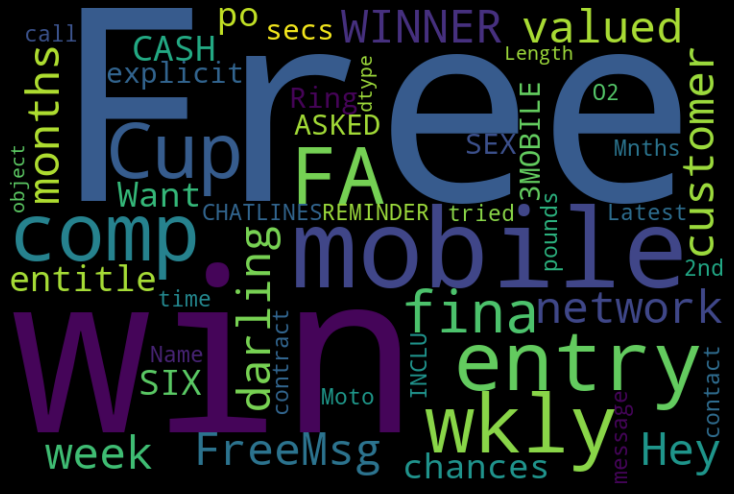

In [80]:
wordcloud('spam')

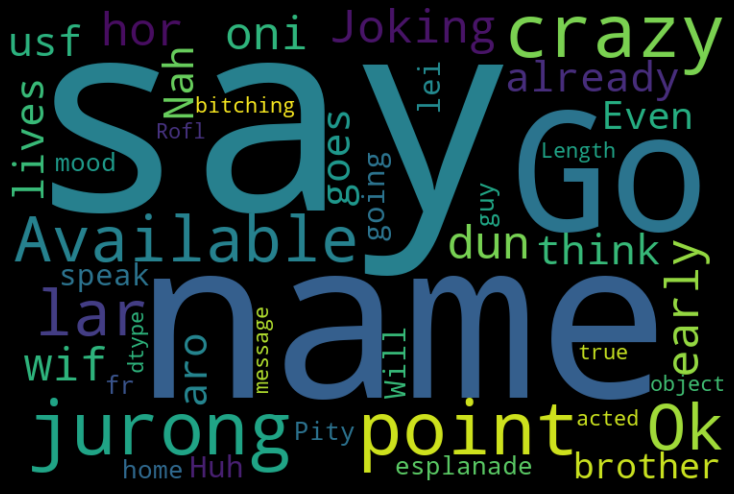

In [81]:
wordcloud('ham')

#### Number of words and message length
In the plots below we can see that the majority of the mesages have a length around 70 characters and the max length is 910 characters.
The average number of words is 15 and the maximum is 171. 
The same message that contains the 910 characters is the one that contains 171 words.

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [83]:
# Calculate the number of words and message length of each message in a separated column:
msgs['number_words'] = msgs['message'].str.split().str.len()
msgs['length'] = msgs['message'].str.len()
msgs.head()

,label,message,number_words,length
0,ham,"Go until jurong point, crazy.. Available only ...",20,111
1,ham,Ok lar... Joking wif u oni...,6,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28,155
3,ham,U dun say so early hor... U c already then say...,11,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",13,61


Text(0.5, 0, 'Length of the word')

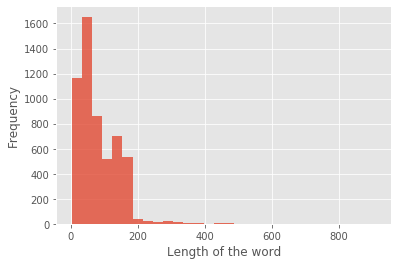

In [84]:
plt.style.use('ggplot')
ax = msgs['length'].plot(bins=30, kind='hist', alpha=0.8)
ax.set_xlabel('Length of the word')

Text(0.5, 0, 'Number of words')

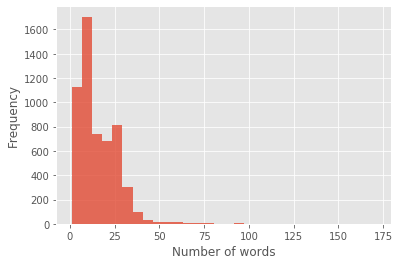

In [85]:
ax2 = msgs['number_words'].plot(bins=30, kind='hist', alpha=0.8)
ax2.set_xlabel('Number of words')

### Statistics

#### Message Length Stats

In [86]:
msgs.length.describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

#### Word count Stats

In [87]:
msgs.number_words.describe()

count    5572.000000
mean       15.597452
std        11.404053
min         1.000000
25%         7.000000
50%        12.000000
75%        23.000000
max       171.000000
Name: number_words, dtype: float64

#### Spam Message Length Stats

In [88]:
msgs[msgs.label == 'spam'].length.describe()

count    747.000000
mean     138.670683
std       28.873603
min       13.000000
25%      133.000000
50%      149.000000
75%      157.000000
max      223.000000
Name: length, dtype: float64

#### Ham Message Length Stats

We can see that the message length stats diverge substantially between Spam and Ham. Ham messages tend to be longer than spam messages.



In [89]:
msgs[msgs.label == 'ham'].length.describe()

count    4825.000000
mean       71.482487
std        58.440652
min         2.000000
25%        33.000000
50%        52.000000
75%        93.000000
max       910.000000
Name: length, dtype: float64

In [90]:
msgs[msgs.number_words == 171]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

In [91]:
msgs[msgs.length == 910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

#### Spam vs Ham Histograms
When comparing the histograms of ham vs spam we can see that spam messages length and number of words don't go above 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f059ac45dd8>,
      dtype=object)

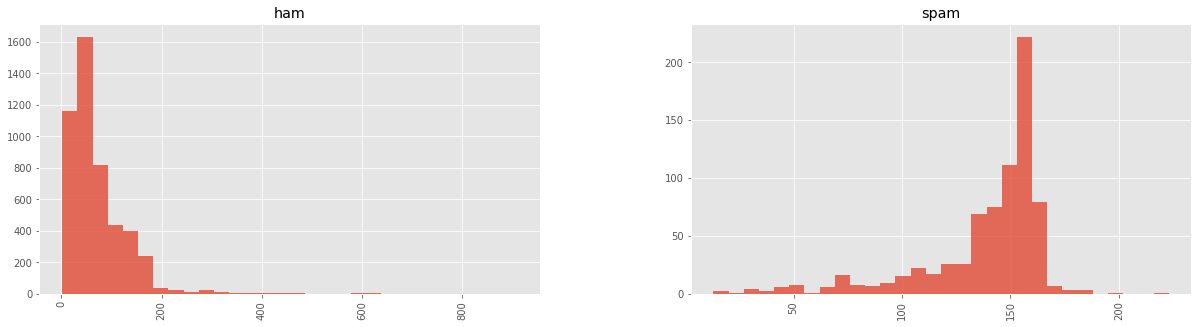

In [92]:
 msgs.hist(column='length', by='label', bins=30,figsize=(20,5), alpha=0.8)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f059aa95ba8>,
      dtype=object)

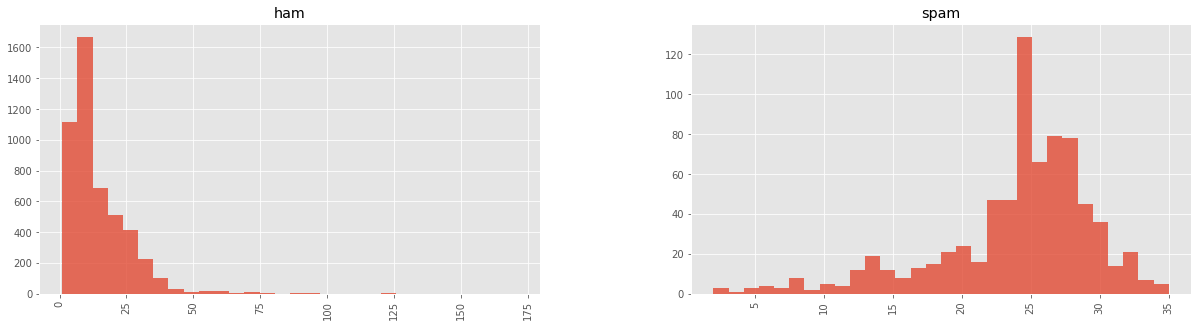

In [93]:
msgs.hist(column='number_words', by='label', bins=30,figsize=(20,5),alpha=0.8)

##Data Classification : Pre-processing and Vectorization
Data classification can be done in a much more efficient way by using numeric vectors. The simplest method to convert a corpus to a vector formats is the bag-of-words approach, where each unique word in the text will be represented by one number.

I will start with cleaning the text by removing punctuation and stopwords, then I will tokenize the masseges to create list of words that we are actually interested in.

As supervised approaches, I will first use the Naive Bayes assumption, that the probability of each word occurring in the document is independent of the occurrences of the other words. Then I will apply Support Vector Machine and compare the two results.

In [94]:
import string
import nltk 
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [95]:
# let's print some examples of stopwords from English
stopwords.words('english')[0:5]

['i', 'me', 'my', 'myself', 'we']

In [0]:
def processing(msg):
  no_punc = [charac for charac in msg if charac not in string.punctuation]
  no_punc = ''.join(no_punc)
  return [word for word in no_punc.split() if word.lower() not in stopwords.words('english')]

In [97]:
msgs['message'].head(5)

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: message, dtype: object

In [98]:
message_no_stopwords = msgs['message'].apply(processing)
message_no_stopwords.head(5)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

In [100]:
transformer = CountVectorizer(analyzer=processing).fit(msgs['message'])

print(len(transformer.vocabulary_))

11425


In [101]:
msg5 = msgs['message'][4]
print(msg5)

Nah I don't think he goes to usf, he lives around here though


In [102]:
transformed5 = transformer.transform([msg5])
print(transformed5)
print(transformed5.shape)

  (0, 2948)	1
  (0, 4777)	1
  (0, 6123)	1
  (0, 6877)	1
  (0, 7842)	1
  (0, 10433)	1
  (0, 10450)	1
  (0, 10799)	1
(1, 11425)


There are eight unique words in message number 5


In [103]:
print(transformer.get_feature_names()[4077])

UKs


Now I will check out how the bag-of-words counts for the SMS corpus is a sparse matrix.

In [0]:
bow_of_msgs = transformer.transform(msgs['message'])

In [105]:
print('Sparse Matrix: ', bow_of_msgs.shape)
print('Non-Zero occurences: ', bow_of_msgs.nnz)

Sparse Matrix:  (5572, 11425)
Non-Zero occurences:  50548


In [106]:
sparsity = (100.0 * bow_of_msgs.nnz / (bow_of_msgs.shape[0] * bow_of_msgs.shape[1]))
print('sparsity : ',sparsity)

sparsity :  0.07940295412668218


I will use TF-IDF method to evaluate how important a word is to the SMS corpus

In [107]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(bow_of_msgs)
tfidf5 = tfidf_transformer.transform(transformed5)
print(tfidf5)

  (0, 10799)	0.4019015462543087
  (0, 10450)	0.35407004444444734
  (0, 10433)	0.27043580251222216
  (0, 7842)	0.4457437273623316
  (0, 6877)	0.35407004444444734
  (0, 6123)	0.24090226292109554
  (0, 4777)	0.3104226271508041
  (0, 2948)	0.4019015462543087


In [108]:
print(tfidf_transformer.idf_[transformer.vocabulary_['c']])
print(tfidf_transformer.idf_[transformer.vocabulary_['customer']])

5.775541185859478
5.8414991536512755


In [109]:
messages_tfidf = tfidf_transformer.transform(bow_of_msgs)
print(messages_tfidf.shape)

(5572, 11425)


##Naive Bayes Approach

In [0]:
from sklearn.naive_bayes import MultinomialNB

In [0]:
spam_detection = MultinomialNB().fit(messages_tfidf, msgs['label'])

In [112]:
print('predicted:', spam_detection.predict(tfidf5)[0])
print('expected:', msgs.label[4])

predicted: ham
expected: ham


### Evaluation

In [113]:
predictions = spam_detection.predict(messages_tfidf)
print(predictions)

['ham' 'ham' 'spam' ... 'ham' 'ham' 'ham']


In [114]:
from sklearn.metrics import classification_report

print (classification_report(msgs['label'], predictions))



              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      4825
        spam       1.00      0.85      0.92       747

    accuracy                           0.98      5572
   macro avg       0.99      0.92      0.95      5572
weighted avg       0.98      0.98      0.98      5572



## Support Vector Machine (SVM) Approach

###Train-Test Split

In [0]:
from sklearn.model_selection import train_test_split

msg_train, msg_test, label_train, label_test = \
train_test_split(msgs['message'], msgs['label'], test_size=0.3)



In [0]:
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer

In [0]:
vectorizer = TfidfVectorizer()
msg_train = vectorizer.fit_transform(msg_train)

In [0]:
model = SVC (C=1000)

In [119]:
model.fit(msg_train, label_train)

SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
msg_test = vectorizer.transform(msg_test)
label_prediction = model.predict(msg_test) 

In [121]:
model.fit(msg_train, label_train)

SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

###Evaluation

In [0]:
from sklearn.metrics import classification_report,confusion_matrix

In [123]:
print(confusion_matrix(label_test,label_prediction))

[[1440    5]
 [  21  206]]


In [124]:
print(classification_report(label_test,label_prediction))

              precision    recall  f1-score   support

         ham       0.99      1.00      0.99      1445
        spam       0.98      0.91      0.94       227

    accuracy                           0.98      1672
   macro avg       0.98      0.95      0.97      1672
weighted avg       0.98      0.98      0.98      1672



SVM algorithm resulted in slighly higher recall in spam detection.

## Neuronal Network Analysis With Keras
In "Machine learning for email spam filtering: review, approaches and open research problems" published in 2019 in ScienceDirect, they analyse and compare multiple Deep Learning techniques, models. This work also presents a review of different approaches proposed in previous work from other publications.
https://www.sciencedirect.com/science/article/pii/S2405844018353404

In this analysis I use CNN and LSTM models. For the CNN method I have created two parameters to help me fine tune the algorithm to increase the accuracy: output dimension and filters.  

In [132]:
%tensorflow_version 1.x

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalMaxPooling1D
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from sklearn.preprocessing import LabelEncoder
from keras import metrics

import tensorflow as tf
tf.__version__

'1.15.0'

In [0]:
msgs = pd.read_csv('data/data.txt', sep='\t', names=["label", "message"])
label=msgs["label"] 
message=msgs["message"] 
num_max = 1000
le = LabelEncoder()
label = le.fit_transform(label)
tok = Tokenizer(num_words=num_max)
tok.fit_on_texts(message)
mat_message = tok.texts_to_matrix(message,mode='count')

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(message,label, test_size = 0.3)
mat_message_tr = tok.texts_to_matrix(x_train,mode='count')
mat_message_tst = tok.texts_to_matrix(x_test,mode='count')

max_len = 100
x_train = tok.texts_to_sequences(x_train)
x_test = tok.texts_to_sequences(x_test)
cnn_message_mat = sequence.pad_sequences(x_train,maxlen=max_len)
max_len = 100
cnn_message_mat_tst = sequence.pad_sequences(x_test,maxlen=max_len)

### Winner Model
A basic network consisting of 3 layers, 2 relus and sigmoid as output layer. For loss I'm using binary cross entropy. This approach is quite standard.

Results: This approach achieves an accuracy of 100%. This model has achieved consistently the highest accuracy among all other methods tried in this work.


In [0]:
def winner_model():  
    model = Sequential()
    model.add(Dense(512, activation='relu', input_shape=(num_max,)))
    model.add(Dropout(0.2))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.summary()
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc',metrics.binary_accuracy])
    return model

### Convolutional Neuronal Network Model
Although CNN models are more oftenly used for image analysis I've decided to give it a try.

I have created 2 parameters to help me fine tune the network. I could have added more parameters and potentially outperform the `winner method` results above.

experiment| output dim | n filters | accuracy
--- | --- | --- | ---
1 | 20 | 64 | 0.9993
2 | 50 | 64 | 1.0000
3 | 20 | 256 | 0.9993 

As you can see I ran the CNN network 3 times with different combination of parameters. The second experiment produced the best CNN results. 



In [0]:
def cnn_model(output_dim,filters):   #CNN
    model = Sequential()
    model.add(Embedding(1000,output_dim,input_length=max_len))
    model.add(Dropout(0.2))
    model.add(Conv1D(filters,3,padding='valid',activation='relu',strides=1))
    model.add(GlobalMaxPooling1D())
    model.add(Dense(256))
    model.add(Dropout(0.2))
    model.add(Activation('relu'))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    model.summary()
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc',metrics.binary_accuracy])
    return model

### Long Short-term memory Neuronal Network Model
Although this method has been used successufully for Spam classification I wasn't able to find any combination of parameters to outperform the results of `winnner method`. LSTM gave me an all time best accuracy of `0.8681`.

LSTM is also the slowest method among all the variations I tried of neuronal networks on the spam dataset provided.

In [0]:
from keras.layers import LSTM

max_features = 5000
maxlen = 400
batch_size = 32
embedding_dims = 50
filters = 250
kernel_size = 3
hidden_dims = 250
epochs = 2

def lstm_model():    #LSTM
    model = Sequential()
    model.add(Embedding(max_features, 128))
    model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2,activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc',metrics.binary_accuracy])
    return model

In [0]:
def check_model(model,xtr,ytr,xts,yts):
    model.fit(xtr,ytr,batch_size=32,epochs=10,verbose=1,validation_split=0.3)
    print(' ')
    model.evaluate(xts,yts)

In [138]:
m = winner_model()
check_model(m,mat_message_tr,y_train,mat_message_tst,y_test)

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 512)               512512    
_________________________________________________________________
dropout_19 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_20 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 257       
Total params: 644,097
Trainable params: 644,097
Non-trainable params: 0
_________________________________________________________________
Train on 2730 samples, validate on 1170 samples
Epoch 1/10
2730/2730 [==============================] - 2s 778us/

In [140]:
m = cnn_model(20,64)
check_model(m,cnn_message_mat,y_train,cnn_message_mat_tst,y_test)

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 100, 20)           20000     
_________________________________________________________________
dropout_23 (Dropout)         (None, 100, 20)           0         
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 98, 64)            3904      
_________________________________________________________________
global_max_pooling1d_8 (Glob (None, 64)                0         
_________________________________________________________________
dense_30 (Dense)             (None, 256)               16640     
_________________________________________________________________
dropout_24 (Dropout)         (None, 256)               0         
_________________________________________________________________
activation_15 (Activation)   (None, 256)             

In [141]:
m = cnn_model(50,64)
check_model(m,cnn_message_mat,y_train,cnn_message_mat_tst,y_test)

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, 100, 50)           50000     
_________________________________________________________________
dropout_25 (Dropout)         (None, 100, 50)           0         
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 98, 64)            9664      
_________________________________________________________________
global_max_pooling1d_9 (Glob (None, 64)                0         
_________________________________________________________________
dense_32 (Dense)             (None, 256)               16640     
_________________________________________________________________
dropout_26 (Dropout)         (None, 256)               0         
_________________________________________________________________
activation_17 (Activation)   (None, 256)             

In [142]:
m = cnn_model(20,256)
check_model(m,cnn_message_mat,y_train,cnn_message_mat_tst,y_test)

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_13 (Embedding)     (None, 100, 20)           20000     
_________________________________________________________________
dropout_27 (Dropout)         (None, 100, 20)           0         
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 98, 256)           15616     
_________________________________________________________________
global_max_pooling1d_10 (Glo (None, 256)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_28 (Dropout)         (None, 256)               0         
_________________________________________________________________
activation_19 (Activation)   (None, 256)             

In [143]:
m = lstm_model()
check_model(m,cnn_message_mat,y_train,cnn_message_mat_tst,y_test)

Train on 2730 samples, validate on 1170 samples
Epoch 1/10
2730/2730 [==============================] - 17s 6ms/step - loss: 1.8175 - acc: 0.8542 - binary_accuracy: 0.8542 - val_loss: 2.2731 - val_acc: 0.8590 - val_binary_accuracy: 0.8590
Epoch 2/10
2730/2730 [==============================] - 14s 5ms/step - loss: 2.1255 - acc: 0.8681 - binary_accuracy: 0.8681 - val_loss: 2.2731 - val_acc: 0.8590 - val_binary_accuracy: 0.8590
Epoch 3/10
2730/2730 [==============================] - 14s 5ms/step - loss: 2.1255 - acc: 0.8681 - binary_accuracy: 0.8681 - val_loss: 2.2731 - val_acc: 0.8590 - val_binary_accuracy: 0.8590
Epoch 4/10
2730/2730 [==============================] - 14s 5ms/step - loss: 2.1255 - acc: 0.8681 - binary_accuracy: 0.8681 - val_loss: 2.2731 - val_acc: 0.8590 - val_binary_accuracy: 0.8590
Epoch 5/10
2730/2730 [==============================] - 14s 5ms/step - loss: 2.1255 - acc: 0.8681 - binary_accuracy: 0.8681 - val_loss: 2.2731 - val_acc: 0.8590 - val_binary_accuracy: 0.85

## Conclusions 

I have managed to cover a variaty of approaches to understand and analyse the spam/ham dataset provided.

For text data I have analysed the `word count` and `message length` stats, `cloud words` and `histograms`. 

I have used `Naive-Bayes` and `Support Vector Machine` for data classification. I also used `deep learning` techniques.

The best method used was using a `simple neuronal network` which achieved an accuracy of `~98%`.


